<h1>Preparation</h1>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [88]:
import seaborn as sns

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [90]:
flight = pd.read_csv('Airline_Delay_Cause.csv')

<h1>Data Processing</h1>

In [91]:
flight.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",86.0,2.0,0.00,0.74,...,0.0,0.00,0.0,0.0,54.0,0.0,26.0,28.0,0.0,0.0
1,2022,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",59.0,5.0,1.77,0.00,...,0.0,1.29,0.0,0.0,290.0,178.0,0.0,69.0,0.0,43.0
2,2022,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",21.0,1.0,0.01,0.00,...,0.0,0.99,0.0,0.0,118.0,1.0,0.0,0.0,0.0,117.0
3,2022,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",98.0,15.0,5.11,0.00,...,0.0,7.20,3.0,0.0,1270.0,334.0,0.0,62.0,0.0,874.0
4,2022,11,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1143.0,114.0,28.67,2.26,...,0.0,45.80,3.0,1.0,10874.0,5451.0,128.0,1071.0,0.0,4224.0


In [92]:
flight.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

<h3>Missing Value</h3>

In [93]:
flight.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            491
arr_del15              733
carrier_ct             491
weather_ct             491
nas_ct                 491
security_ct            491
late_aircraft_ct       491
arr_cancelled          491
arr_diverted           491
arr_delay              491
carrier_delay          491
weather_delay          491
nas_delay              491
security_delay         491
late_aircraft_delay    491
dtype: int64

In [94]:
flight.fillna(0,inplace=True)

In [95]:
flight.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

<h3>Merge Year and Month</h3>

In [96]:
flight['date']=pd.to_datetime(flight[['year','month']].assign(DAY=1))

<h3>Delimit Geo Information</h3>

In [97]:
flight[['city','state','airport_name']]=flight['airport_name'].str.split(',|:',expand=True)

In [98]:
flight['state'] = flight['state'].str.replace(" ","")

In [99]:
flight['airport_name'] = flight['airport_name'].str[1:]

<h1>Exploratory Data Analysis</h1>

<h3>Data Distribution</h3>

In [100]:
flight["arr_flights"].describe()

count    328207.000000
mean        379.819373
std        1024.042306
min           0.000000
25%          58.000000
50%         120.000000
75%         271.000000
max       21977.000000
Name: arr_flights, dtype: float64

(array([33334., 41200., 42509., 34506., 26059., 21179., 16253., 12933.,
         9905.,  8361.]),
 array([  1. ,  28.2,  55.4,  82.6, 109.8, 137. , 164.2, 191.4, 218.6,
        245.8, 273. ]),
 <BarContainer object of 10 artists>)

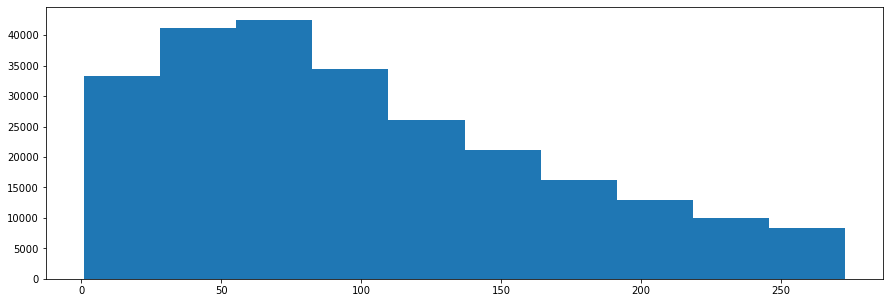

In [101]:
plt.figure(figsize=(15,5))
plt.hist(flight["arr_flights"],range=[1,273])

In [102]:
flight["arr_delay"].describe()

count    328207.000000
mean       4211.526235
std       12536.806598
min           0.000000
25%         430.000000
50%        1193.000000
75%        3071.000000
max      433687.000000
Name: arr_delay, dtype: float64

(array([63343., 43671., 33759., 26309., 20895., 16551., 13441., 11150.,
         9387.,  7888.]),
 array([   0.,  308.,  616.,  924., 1232., 1540., 1848., 2156., 2464.,
        2772., 3080.]),
 <BarContainer object of 10 artists>)

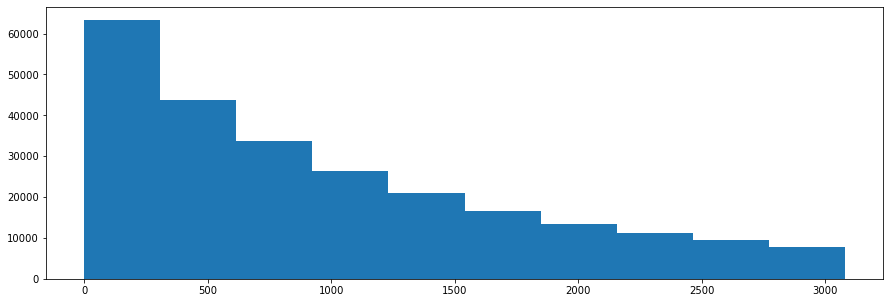

In [103]:
plt.figure(figsize=(15,5))
plt.hist(flight["arr_delay"],range=[0,3080])

<h3>Time Series Analysis</h3>

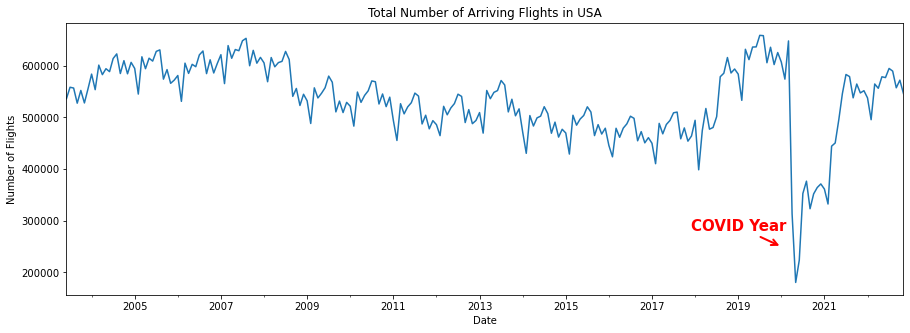

In [104]:
plt.figure(figsize=(15,5))
flight.groupby(['date'])['arr_flights'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.title('Total Number of Arriving Flights in USA')
plt.annotate('COVID Year',
             xy=('2020',250000),
             xytext=('2019',280000),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', linewidth=2),
             fontsize=15,
             fontweight='bold',
             color='red',
             horizontalalignment='center')
plt.show()

In [105]:
flight.groupby(['date'])['arr_flights'].sum().describe()

count       234.000000
mean     532732.380342
std       73783.336713
min      180617.000000
25%      490402.000000
50%      538716.500000
75%      585649.500000
max      659029.000000
Name: arr_flights, dtype: float64

In [106]:
flight.groupby(['date'])['arr_flights'].sum().sort_values(ascending=True)

date
2020-05-01    180617.0
2020-06-01    223732.0
2020-04-01    313382.0
2020-09-01    323347.0
2021-02-01    332468.0
                ...   
2020-03-01    648229.0
2007-07-01    648560.0
2007-08-01    653279.0
2019-08-01    658461.0
2019-07-01    659029.0
Name: arr_flights, Length: 234, dtype: float64

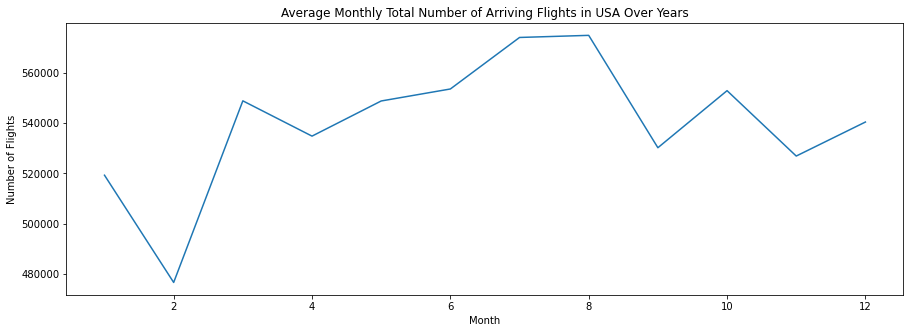

In [107]:
plt.figure(figsize=(15,5))
#exlcude year 2020 here due to COVID's influence
flight[flight['year']!=2020].groupby(['month','year'])['arr_flights'].sum().groupby(['month']).mean().plot()
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Average Monthly Total Number of Arriving Flights in USA Over Years')
plt.show()

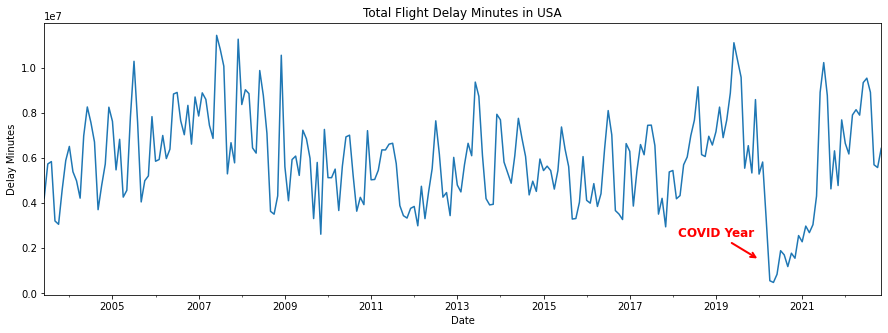

In [108]:
plt.figure(figsize=(15,5))
flight.groupby(['date'])['arr_delay'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Delay Minutes')
plt.title('Total Flight Delay Minutes in USA')
plt.annotate('COVID Year',
             xy=('2020', 1500000),
             xytext=('2019',2500000),
             arrowprops=dict(facecolor='red', edgecolor='red', linewidth=2, arrowstyle='->'),
             fontsize=12,
             fontweight='bold',
             color='red',
             horizontalalignment='center')
plt.show()

In [109]:
flight.groupby(['date'])['arr_delay'].sum().describe()

count    2.340000e+02
mean     5.907062e+06
std      2.097094e+06
min      4.827010e+05
25%      4.338634e+06
50%      5.845668e+06
75%      7.197195e+06
max      1.143117e+07
Name: arr_delay, dtype: float64

In [110]:
flight.groupby(['date'])['arr_delay'].sum().sort_values(ascending=True)

date
2020-05-01      482701.0
2020-04-01      558077.0
2020-06-01      843800.0
2020-09-01     1185386.0
2020-11-01     1555140.0
                 ...    
2008-12-01    10549666.0
2007-07-01    10815811.0
2019-06-01    11103884.0
2007-12-01    11261442.0
2007-06-01    11431169.0
Name: arr_delay, Length: 234, dtype: float64

In [111]:
from statsmodels.tsa.stattools import adfuller
adfuller(flight[flight['year']!=2020].groupby(['date'])['arr_delay'].sum())
#ADF test, p-value is less than 0.05, data is non-stationary

(-2.3568874148273022,
 0.15427602445798372,
 13,
 208,
 {'1%': -3.4621857592784546,
  '5%': -2.875537986778846,
  '10%': -2.574231080806213},
 6399.646098077889)

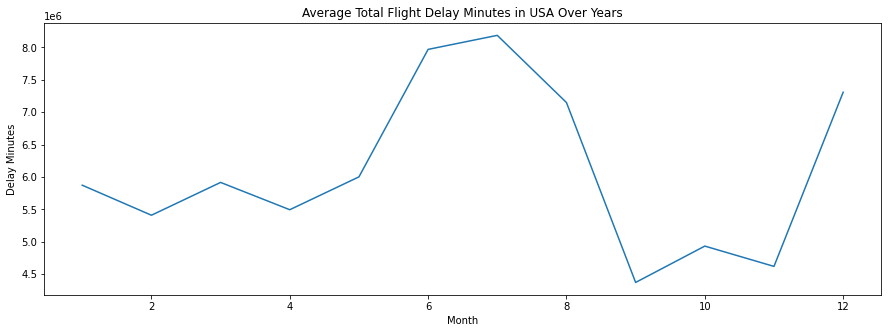

In [112]:
plt.figure(figsize=(15,5))
flight[flight['year']!=2020].groupby(['month','year'])['arr_delay'].sum().groupby(['month']).mean().plot()
#exlcude year 2020 here due to COVID's influence
plt.xlabel('Month')
plt.ylabel('Delay Minutes')
plt.title('Average Total Flight Delay Minutes in USA Over Years')
plt.show()

<h3>Delay Cause Analysis</h3>

/var/folders/79/wn0l4g7119l_cnl729l6kr6w0000gn/T/ipykernel_90677/1975958912.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



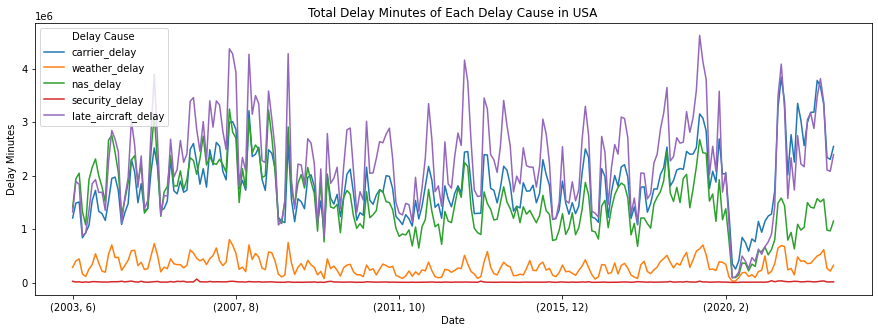

In [113]:
flight.groupby(['year','month'])['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'].sum().plot(figsize=(15,5))
plt.legend(title='Delay Cause')
plt.xlabel('Date')
plt.ylabel('Delay Minutes')
plt.title('Total Delay Minutes of Each Delay Cause in USA')
plt.show()

/var/folders/79/wn0l4g7119l_cnl729l6kr6w0000gn/T/ipykernel_90677/1752273150.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Average Monthly Delay Cause Minute% in USA Over Years')

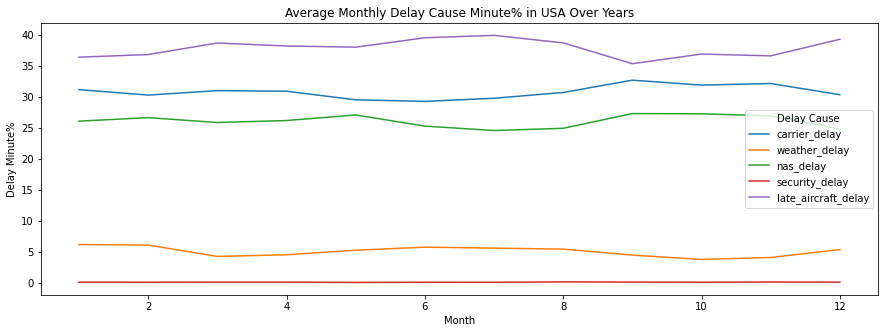

In [114]:
flight[flight['year']!=2020].groupby(['month','year'])['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'].sum().groupby(['month']).agg('mean').apply(lambda x:round(x/x.sum()*100,2), axis=1).plot(kind='line',figsize=(15,5))
plt.legend(title='Delay Cause')
plt.xlabel('Month')
plt.ylabel('Delay Minute%')
plt.title('Average Monthly Delay Cause Minute% in USA Over Years')

In [115]:
airline_delay_cause=flight[flight['year']!=2020].groupby(['year','carrier_name'])['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'].sum().groupby(['carrier_name']).mean().T.reset_index()
airline_delay_cause.rename(columns={'index':'delay_cause'},inplace=True)
airline_delay_cause = airline_delay_cause.set_index('delay_cause')
airline_delay_cause['total']=airline_delay_cause.sum(axis=1)

/var/folders/79/wn0l4g7119l_cnl729l6kr6w0000gn/T/ipykernel_90677/3103124788.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [116]:
airline_delay_cause

carrier_name,ATA Airlines d/b/a ATA,AirTran Airways Corporation,Alaska Airlines Inc.,Allegiant Air,Aloha Airlines Inc.,America West Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Coast Airlines,Atlantic Southeast Airlines,...,PSA Airlines Inc.,Pinnacle Airlines Inc.,Republic Airline,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America,total
delay_cause,,,,,,,,,,,,,,,,,,,,,
carrier_delay,101376.00,3.615922e+05,468286.842105,628509.25,48307.333333,566482.666667,2.748049e+06,1.418292e+06,532000.5,1.537507e+06,...,716935.00,873032.2,896844.75,2.402084e+06,2.963427e+06,5.550641e+05,1.054174e+06,1.623988e+06,119627.714286,3.235775e+07
weather_delay,5784.00,2.798317e+04,41145.000000,119955.75,765.666667,23904.333333,5.072440e+05,3.757650e+05,158638.5,4.798569e+05,...,170072.00,133948.4,179858.75,4.113998e+05,3.893841e+05,8.087586e+04,1.136862e+05,2.446668e+05,35071.857143,6.114340e+06
nas_delay,217992.00,7.345010e+05,380913.526316,321797.00,5311.000000,441363.666667,2.205175e+06,1.477020e+06,758870.0,1.027648e+06,...,414367.75,661666.2,1093516.00,1.274734e+06,1.579955e+06,1.107128e+06,1.312294e+06,1.790534e+06,300222.428571,2.902604e+07
security_delay,3227.50,0.000000e+00,7941.578947,7259.00,623.666667,8089.333333,1.382537e+04,2.475833e+03,1578.0,4.418222e+03,...,4634.50,2135.4,3403.00,1.107563e+04,2.790179e+04,1.264671e+04,8.570385e+03,2.346579e+03,2662.714286,1.881176e+05
late_aircraft_delay,182408.25,1.151756e+06,533288.631579,827931.75,32466.000000,388208.000000,3.113627e+06,2.095214e+06,1000498.0,9.928228e+05,...,1215934.75,849047.4,1234428.75,2.552539e+06,5.743697e+06,6.883239e+05,1.227319e+06,2.462582e+06,241775.857143,3.893291e+07


In [117]:
pie_labels = ['Carrier Delay', ' Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']

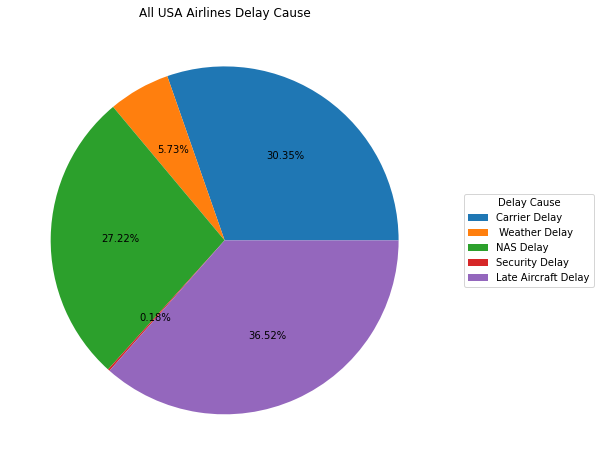

In [118]:
airline_delay_cause['total'].plot(kind='pie', autopct='%1.2f%%',figsize=(15,8),labeldistance=None)
plt.legend(pie_labels, title='Delay Cause', loc='center', bbox_to_anchor=(1.2, 0.5))
plt.ylabel('')
plt.title('All USA Airlines Delay Cause')
plt.show()

In [119]:
airline_delay_cause.apply(lambda x: round(x/x.sum()*100,2),axis=0).T.style.highlight_max(color='yellow')

delay_cause,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,
ATA Airlines d/b/a ATA,19.850000,1.130000,42.680000,0.630000,35.710000
AirTran Airways Corporation,15.890000,1.230000,32.270000,0.000000,50.610000
Alaska Airlines Inc.,32.710000,2.870000,26.610000,0.550000,37.250000
Allegiant Air,32.980000,6.300000,16.890000,0.380000,43.450000
Aloha Airlines Inc.,55.230000,0.880000,6.070000,0.710000,37.120000
America West Airlines Inc.,39.670000,1.670000,30.910000,0.570000,27.180000
American Airlines Inc.,32.000000,5.910000,25.680000,0.160000,36.260000
American Eagle Airlines Inc.,26.420000,7.000000,27.510000,0.050000,39.030000
Atlantic Coast Airlines,21.700000,6.470000,30.950000,0.060000,40.810000


In [120]:
airline_delay_cause[['total','United Air Lines Inc.','American Airlines Inc.','Delta Air Lines Inc.','Southwest Airlines Co.']].apply(lambda x:round(x/x.sum()*100,2), axis=0).T

delay_cause,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,
total,30.35,5.73,27.22,0.18,36.52
United Air Lines Inc.,26.52,4.00,29.24,0.04,40.21
American Airlines Inc.,32.00,5.91,25.68,0.16,36.26
Delta Air Lines Inc.,36.03,5.29,29.37,0.10,29.22
Southwest Airlines Co.,27.68,3.64,14.76,0.26,53.66


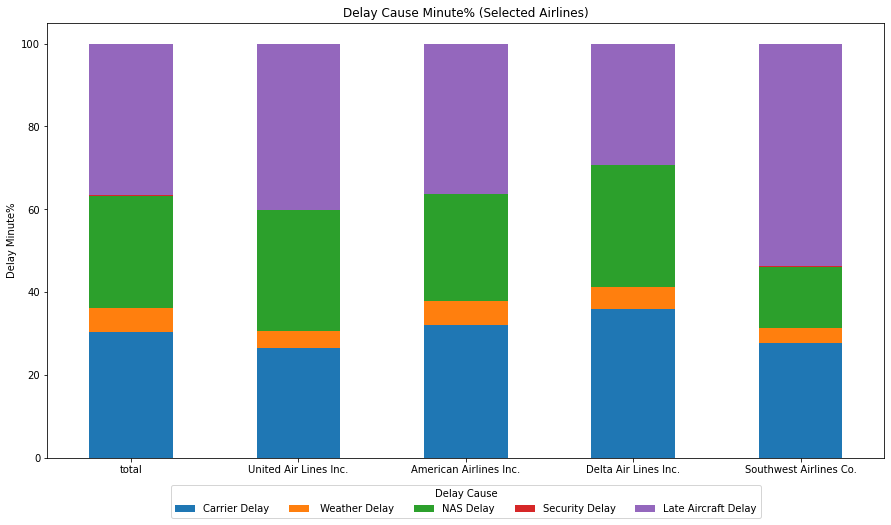

In [121]:
airline_delay_cause[['total','United Air Lines Inc.','American Airlines Inc.','Delta Air Lines Inc.','Southwest Airlines Co.']].apply(lambda x:x/x.sum()*100).T.plot(kind='bar',stacked=True,figsize=(15,8))
plt.xticks(rotation=0)
plt.legend(pie_labels, title='Delay Cause', loc='center', bbox_to_anchor=(0.5,-0.1),ncol=5)
plt.xlabel('')
plt.ylabel('Delay Minute%')
plt.title('Delay Cause Minute% (Selected Airlines)')
plt.show()

<h3>Geographic Information Analysis</h3>

In [122]:
state_arr_flights=flight.groupby(['year','state'], as_index=False)['arr_flights'].sum()

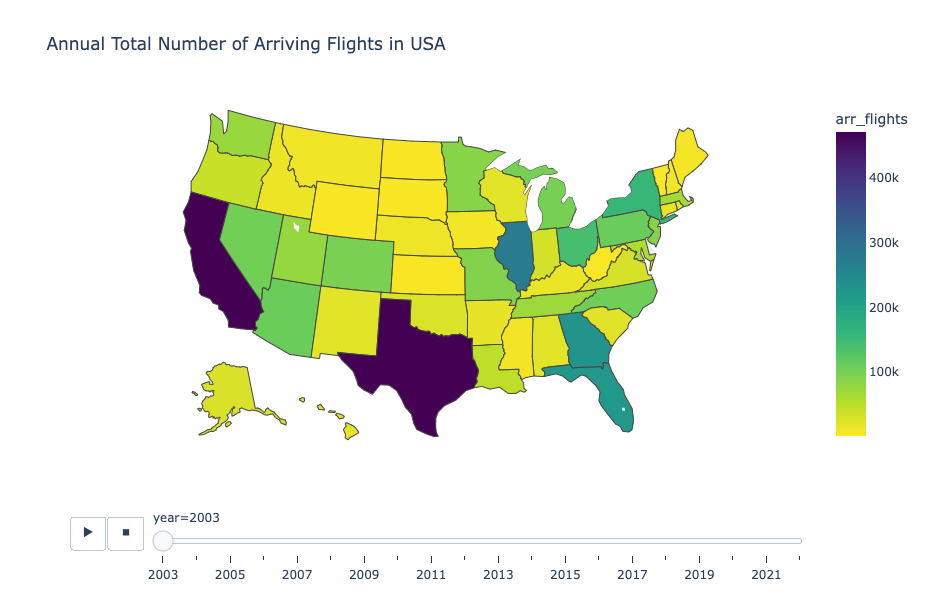

In [123]:
fig1 = px.choropleth(state_arr_flights,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arr_flights',
                    color_continuous_scale="viridis_r", 
                    animation_frame='year',
                    title='Annual Total Number of Arriving Flights in USA')

fig1.update_layout(width=800, height=600)
fig1.show()

In [124]:
state_arr_delay=flight.groupby(['year','state'], as_index=False)['arr_delay'].sum()

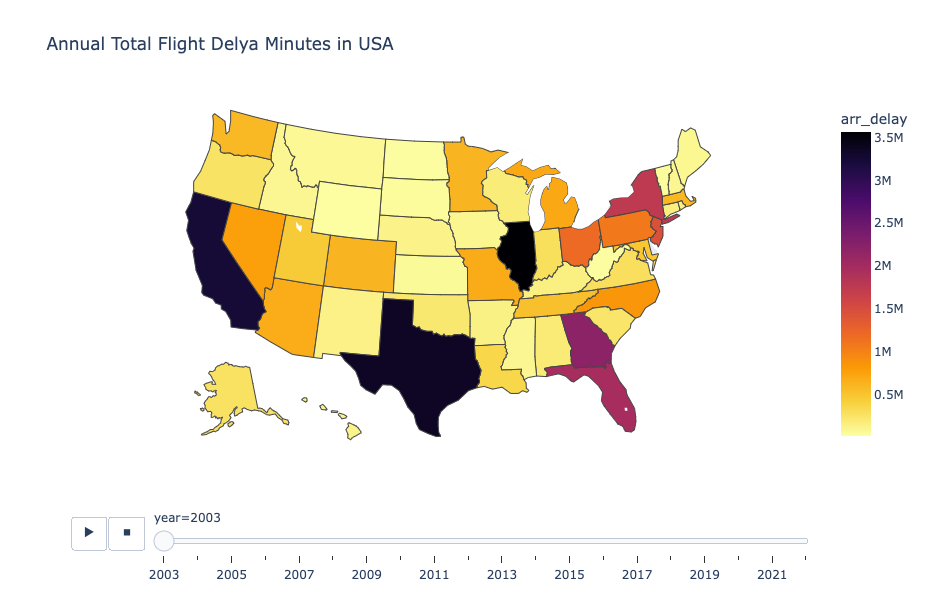

In [125]:
fig2 = px.choropleth(state_arr_delay,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='arr_delay',
                    color_continuous_scale="inferno_r", 
                    animation_frame='year',
                    title='Annual Total Flight Delya Minutes in USA')

fig2.update_layout(width=800, height=600)
fig2.show()

<h1>Austin Airport Performance Forecast</h1>

In [126]:
flight.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date,city,state
0,2022,11,9E,Endeavor Air Inc.,ABY,Southwest Georgia Regional,86.0,2.0,0.00,0.74,...,0.0,54.0,0.0,26.0,28.0,0.0,0.0,2022-11-01,Albany,GA
1,2022,11,9E,Endeavor Air Inc.,AEX,Alexandria International,59.0,5.0,1.77,0.00,...,0.0,290.0,178.0,0.0,69.0,0.0,43.0,2022-11-01,Alexandria,LA
2,2022,11,9E,Endeavor Air Inc.,AGS,Augusta Regional at Bush Field,21.0,1.0,0.01,0.00,...,0.0,118.0,1.0,0.0,0.0,0.0,117.0,2022-11-01,Augusta,GA
3,2022,11,9E,Endeavor Air Inc.,ALB,Albany International,98.0,15.0,5.11,0.00,...,0.0,1270.0,334.0,0.0,62.0,0.0,874.0,2022-11-01,Albany,NY
4,2022,11,9E,Endeavor Air Inc.,ATL,Hartsfield-Jackson Atlanta International,1143.0,114.0,28.67,2.26,...,1.0,10874.0,5451.0,128.0,1071.0,0.0,4224.0,2022-11-01,Atlanta,GA


In [127]:
austin = flight[flight['airport_name']=='Austin - Bergstrom International']

In [128]:
austin_delay = austin.groupby(['date'])['arr_delay'].sum().resample('M').mean()

In [129]:
delay_train = austin_delay.loc[:'2022']

In [130]:
delay_model = ExponentialSmoothing(delay_train, seasonal_periods=12, trend='add', seasonal='add')
delay_fit = delay_model.fit()

/Users/zhaochongxin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [131]:
delay_forecast = delay_fit.forecast(12)

In [132]:
delay_data = pd.concat([delay_train, delay_forecast], axis=1)
delay_data = delay_data.rename(columns={'arr_delay':'actual', 0:'forecast'})

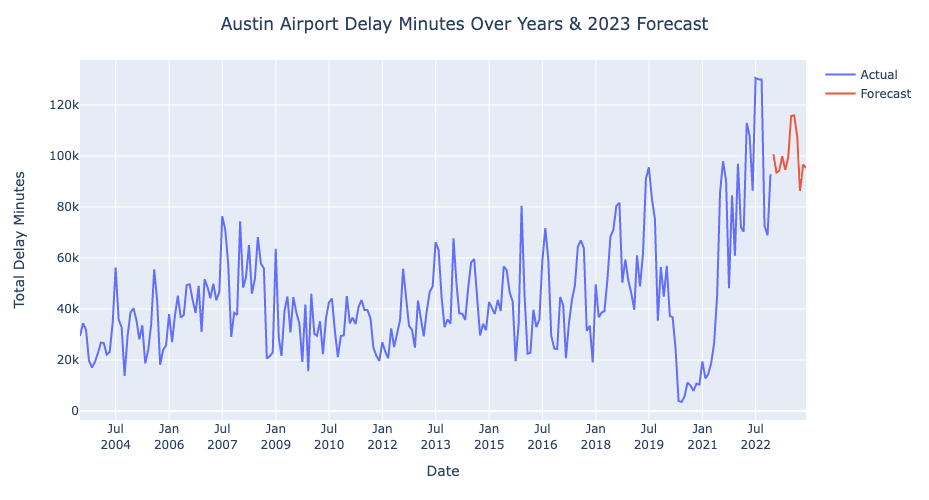

In [133]:
fig = px.line()
fig.add_scatter(x=delay_data.index, y=delay_data['actual'], mode='lines', name='Actual')
fig.add_scatter(x=delay_data.index, y=delay_data['forecast'], mode='lines', name='Forecast')
fig.update_layout(title=dict(text='Austin Airport Delay Minutes Over Years & 2023 Forecast', 
                             x=0.5),
                  xaxis=dict(title='Date',
                         tickmode='linear',
                         dtick='M18',
                         tickformat='%b\n%Y'),
                  yaxis_title='Total Delay Minutes',
                  width=900, 
                  height=500)
fig.show()

In [134]:
austin_flights = austin.groupby(['date'])['arr_flights'].sum().resample('M').mean()

In [135]:
flights_train = austin_flights.loc[:'2022']

In [136]:
flights_model = ExponentialSmoothing(flights_train, seasonal_periods=12, trend='add', seasonal='add')
flights_fit = flights_model.fit()

In [137]:
flights_forecast = flights_fit.forecast(12)

In [138]:
flights_data = pd.concat([flights_train, flights_forecast], axis=1)
flights_data = flights_data.rename(columns={'arr_flights':'actual', 0:'forecast'})

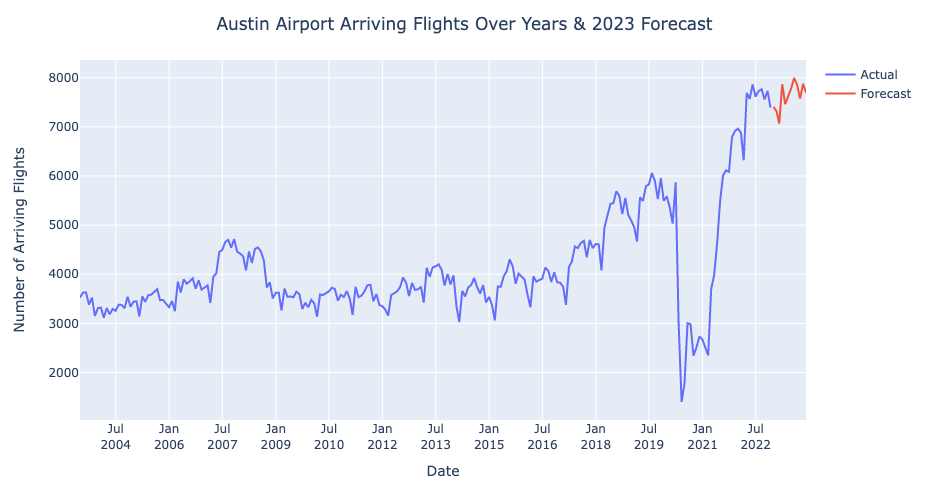

In [139]:
fig2 = px.line()
fig2.add_scatter(x=flights_data.index, y=flights_data['actual'], mode='lines', name='Actual')
fig2.add_scatter(x=flights_data.index, y=flights_data['forecast'], mode='lines', name='Forecast')
fig2.update_layout(title=dict(text='Austin Airport Arriving Flights Over Years & 2023 Forecast',
                              x=0.5),
                   yaxis_title='Number of Arriving Flights',
                   xaxis=dict(title='Date',
                              dtick='M18',
                              tickformat='%b\n%Y'),
                   height=500,
                   width=900)